## Introduction

> This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

> Our analysis will try to answer questions of how duration between booking and reservation and other factors affect reservation price. Further questions of price analysis will also be performed to find optimum independent parameters to find minimum dependent variable value, in this case, the booking price.

important commands
> - Shift + Enter (executes cell)
> - Alt + Enter (executes and creates new cell)
> - Esc + Shift + Up/Down (expands selection)
> - Up/Down (moves cells up/down)

> Esc + M (converts cell to markup)
> Esc + Y (converts cell to code)
> Esc + H (shows all commands)

> Underscore twice (converts to bold)
> Astrisk once (convrets to italics)


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
import seaborn as sns

## Exploratory Analysis

Read csv files without header included and show shape

In [2]:
df_hotel =pd.read_csv("hotel_bookings.csv", skiprows=0, header=0)
# storing data in backup for easy loading in next cell 
# (helps keep run context for each cell, so that they can be run independently)
df_hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
weekday = []
isWeekend = []
for index, row in df_hotel.iterrows():
    year = df_hotel['arrival_date_year'].iloc[index]
    month_name = df_hotel['arrival_date_month'].iloc[index]
    month_number = datetime.datetime.strptime(month_name, '%B').month
    dayOfMonth = df_hotel['arrival_date_day_of_month'].iloc[index]
    dayOfWeek = datetime.datetime(year,month_number,dayOfMonth).weekday()
    weekday.append(dayOfWeek)
    if (dayOfWeek>3):
        isWeekend.append(1)
    else:
        isWeekend.append(0)
       
df_hotel['arrival_weekday_num'] = weekday
df_hotel['arrival_day_is_weekend'] = isWeekend

df_hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_weekday_num,arrival_day_is_weekend
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,0


In [4]:
# sample read and save - will be removed after project is done
#df_hotel = pd.read_pickle('hotel_bookings_.pkl')
df_hotel.to_pickle('hotel_bookings_1.pkl')
print(df_hotel.shape)
df_hotel.to_pickle('hotel_bookings_.pkl')

(119390, 34)


<hr><hr>

Show columns and their data types for further analysis

In [5]:
df_hotel = pd.read_pickle('hotel_bookings_1.pkl')
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

<hr><hr>
Describe distributions of each column, it will make sense for numerical columns

In [6]:
df_hotel = pd.read_pickle('hotel_bookings_1.pkl')
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_weekday_num,arrival_day_is_weekend
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2.995929,0.434098
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,1.951750,0.495640
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,3.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,5.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,6.000000,1.000000


The above data types show that largenumber of columns such as hotel, arrival_date_month, children, meal, country etc. must be converted to make sense of the data for regression analysis.
<hr>

List sum of __NA__ values to consider replacement

In [7]:
df_hotel = pd.read_pickle('hotel_bookings_1.pkl')
print(df_hotel.isna().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Rows with empty __Country__ can be dropped since it is a very small number of rows

In [8]:
df_hotel = pd.read_pickle('hotel_bookings_1.pkl')

df_hotel=df_hotel.dropna(subset=["country"]) 

df_hotel.to_pickle('hotel_bookings_2.pkl')
df_hotel.shape

(118902, 34)

Distribution of countries by number of rows is where country contirbutes more than 100 rows:

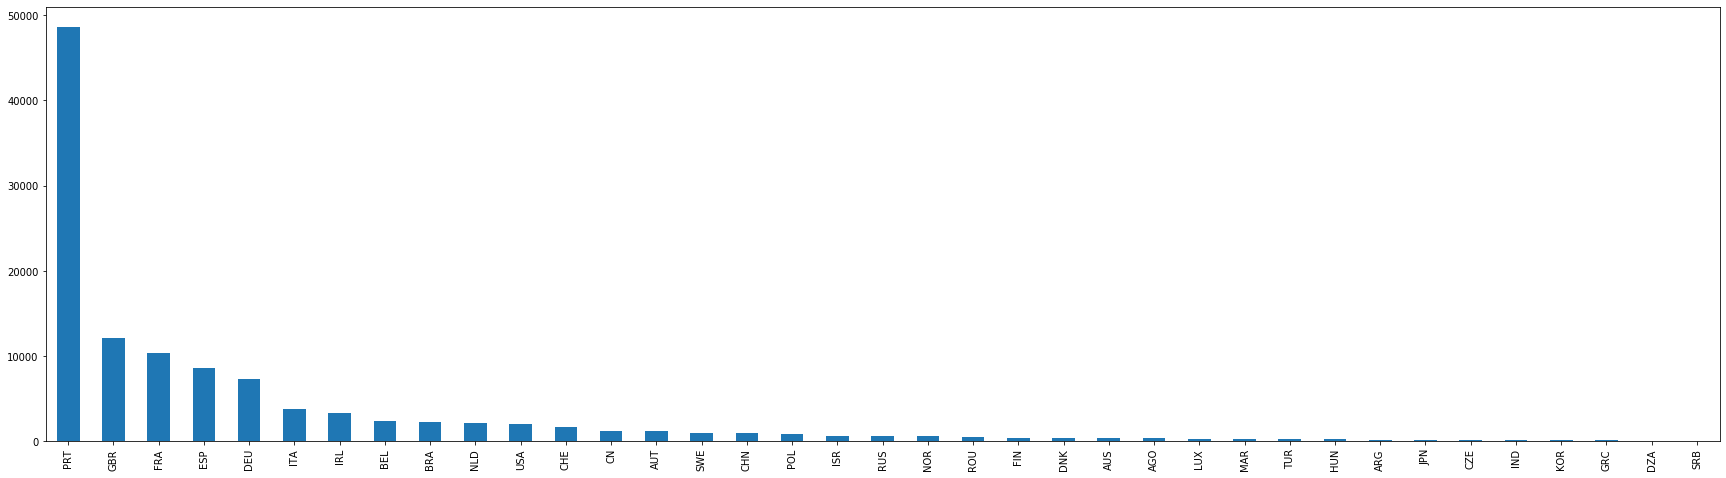

In [9]:
df_hotel = pd.read_pickle('hotel_bookings_2.pkl')
country_vc = df_hotel.country.value_counts()
country_vc[country_vc > 100].plot(kind="bar",figsize=(30, 8))

This indicates that countries that contribute less than 100 rows, contribute very little number of rows to the data compared to countries with most contribution of rows.
Therefore, it is a good idea to reduce number of countries to those with more than 100 rows, since that will give us a smaller number of countries for hot encoding.
Based on above logic, we will remove data from countries that __contirbute < 100 rows__

In [10]:
df_hotel = pd.read_pickle('hotel_bookings_2.pkl')

df_hotel = df_hotel.groupby('country').filter(lambda x: len(x) > 100)

df_hotel.to_pickle('hotel_bookings_3.pkl')

print(df_hotel.shape)
print('\nUnique countries without rows < 100: \n', df_hotel.country.unique())

(116412, 34)

Unique countries without rows < 100: 
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'ARG' 'POL' 'DEU' 'BEL'
 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'CZE' 'BRA' 'FIN'
 'LUX' 'IND' 'CHN' 'MAR' 'SRB' 'AUT' 'TUR' 'AGO' 'ISR' 'DZA' 'KOR' 'HUN'
 'JPN']


<hr>


__Children__ are empty in only 4 rows. Replacing them with median number of children can be used to populated those 4 rows.

In [11]:
df_hotel = pd.read_pickle('hotel_bookings_3.pkl')

df_hotel['children'].fillna(df_hotel['children'].median(),inplace=True)

df_hotel.to_pickle('hotel_bookings_4.pkl')

<hr><hr>

Customers who use __Agent__ or book through a __Company__ column may get better __Average Daily Rate__ then those who don't use them. Therefore, we will keep these columns but convert them to binary columns, filling __NA__ values with __0__ and filling it with __1__ where an agent or company is used for booking.

In [12]:
df_hotel = pd.read_pickle('hotel_bookings_4.pkl')

df_hotel.agent.fillna(0, inplace=True)
df_hotel.company.fillna(0, inplace=True)

df_hotel.loc[(df_hotel.agent > 0),'agent'] = 1
df_hotel.loc[(df_hotel.company > 0),'company'] = 1


df_hotel.to_pickle('hotel_bookings_5.pkl')

print(df_hotel.agent.unique())
print(df_hotel.company.unique())


[0. 1.]
[0. 1.]


<hr>

List __NA__ values again to ensure there is none left

In [13]:
df_hotel = pd.read_pickle('hotel_bookings_5.pkl')

print(df_hotel.isna().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

<hr>

In [14]:
df_hotel = pd.read_pickle('hotel_bookings_5.pkl')

df_hotel[['arrival_date_year','arrival_date_week_number','reservation_status_date', 'adr']].corr()

,arrival_date_year,arrival_date_week_number,adr
arrival_date_year,1.000000,-0.541712,0.195661
arrival_date_week_number,-0.541712,1.000000,0.076503
adr,0.195661,0.076503,1.000000


Our target variable is __adr (Average Daily Rate)__, since __arrival_date_year__ and __arrival_date_week_number__ have near zero correlation , they will not proide  __adr__, therefore, we can drop these 2 columns.

Similarly, __reservation_status_date__ also have incremental value distributed over all of our data, hence they can't provide any predictive value and can be dropped.

In [15]:
df_hotel = pd.read_pickle('hotel_bookings_5.pkl')

df_hotel = df_hotel.drop(['arrival_date_year','arrival_date_week_number','reservation_status_date'],axis=1)

df_hotel.to_pickle('hotel_bookings_6.pkl')

<hr>

Draw box plots of columns with continuous variables to remove outliers.

In [16]:
df_hotel = pd.read_pickle('hotel_bookings_6.pkl')
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116412 entries, 0 to 119389
Data columns (total 31 columns):
hotel                             116412 non-null object
is_canceled                       116412 non-null int64
lead_time                         116412 non-null int64
arrival_date_month                116412 non-null object
arrival_date_day_of_month         116412 non-null int64
stays_in_weekend_nights           116412 non-null int64
stays_in_week_nights              116412 non-null int64
adults                            116412 non-null int64
children                          116412 non-null float64
babies                            116412 non-null int64
meal                              116412 non-null object
country                           116412 non-null object
market_segment                    116412 non-null object
distribution_channel              116412 non-null object
is_repeated_guest                 116412 non-null int64
previous_cancellations            116412 

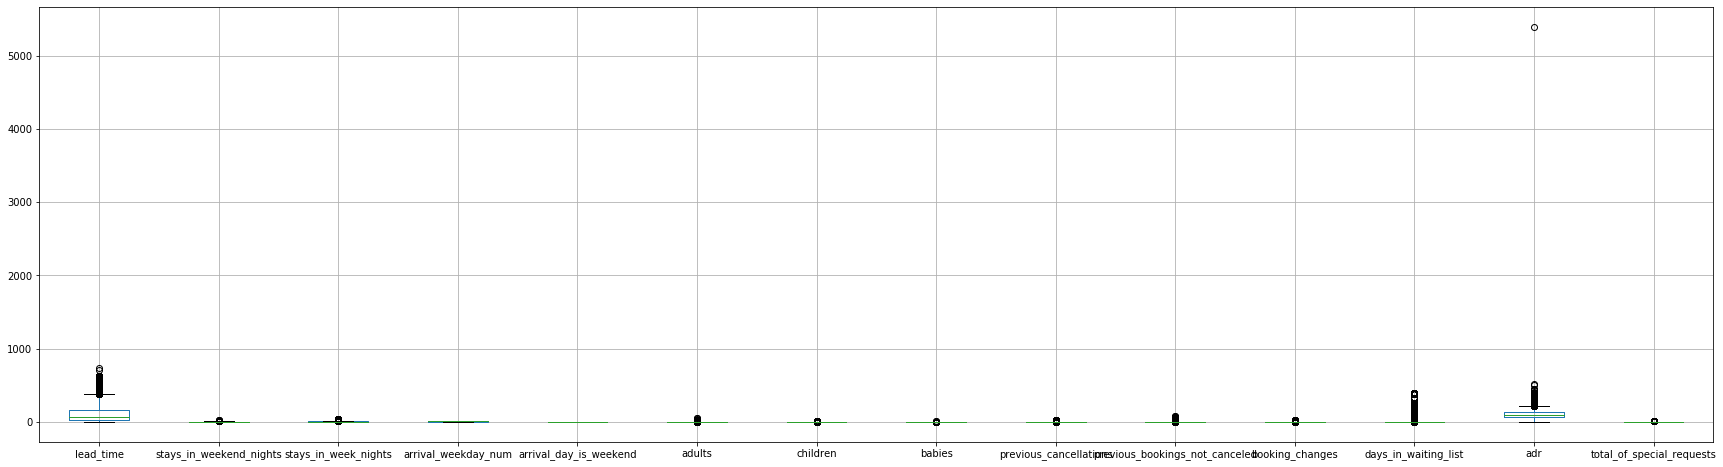

In [17]:
df_hotel = pd.read_pickle('hotel_bookings_6.pkl')

df_hotel_cont = df_hotel[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','arrival_weekday_num',
                          'arrival_day_is_weekend', 'adults', 'children', 'babies', 'previous_cancellations'
                            , 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr',
                            'total_of_special_requests']]

df_hotel_cont.boxplot(figsize=(30, 8))

We notice that there is a single outlier value of __adr__ column within upper quantile, that must be removed to unskew the data.
Rest of the columns have values outside Q3, however, they are all contiguous, therefore, they do not need to be removed in our opionion.

In [18]:
df_hotel = pd.read_pickle('hotel_bookings_6.pkl')

print('Before: ', df_hotel.shape)

df_hotel = df_hotel[df_hotel["adr"] != df_hotel["adr"].max()]

print('After: ', df_hotel.shape)

df_hotel.to_pickle('hotel_bookings_7.pkl')

Before:  (116412, 31)
After:  (116411, 31)


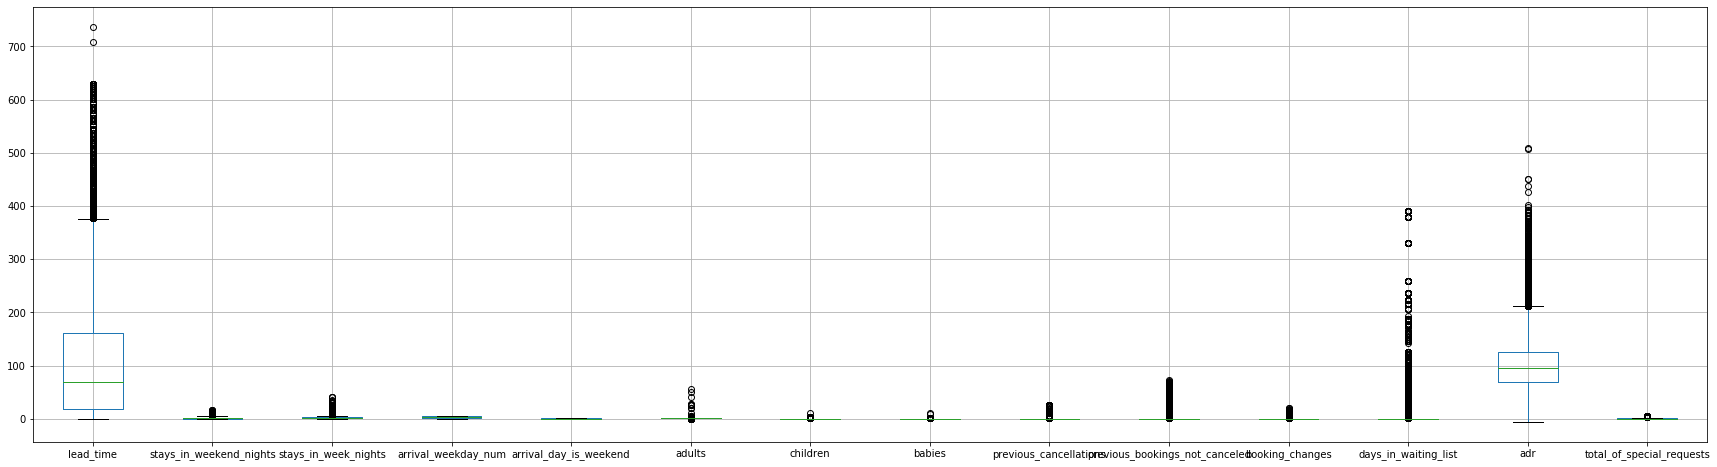

In [19]:
df_hotel = pd.read_pickle('hotel_bookings_7.pkl')

df_hotel_cont = df_hotel[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','arrival_weekday_num',
                          'arrival_day_is_weekend', 'adults', 'children', 'babies', 'previous_cancellations'
                            , 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr',
                            'total_of_special_requests']]

df_hotel_cont.boxplot(figsize=(30, 8))


<hr>

Analysis of __adr (Average Daily Rate)__ based on month.
It should reveal relationship between month of the year and adr flucatuation.

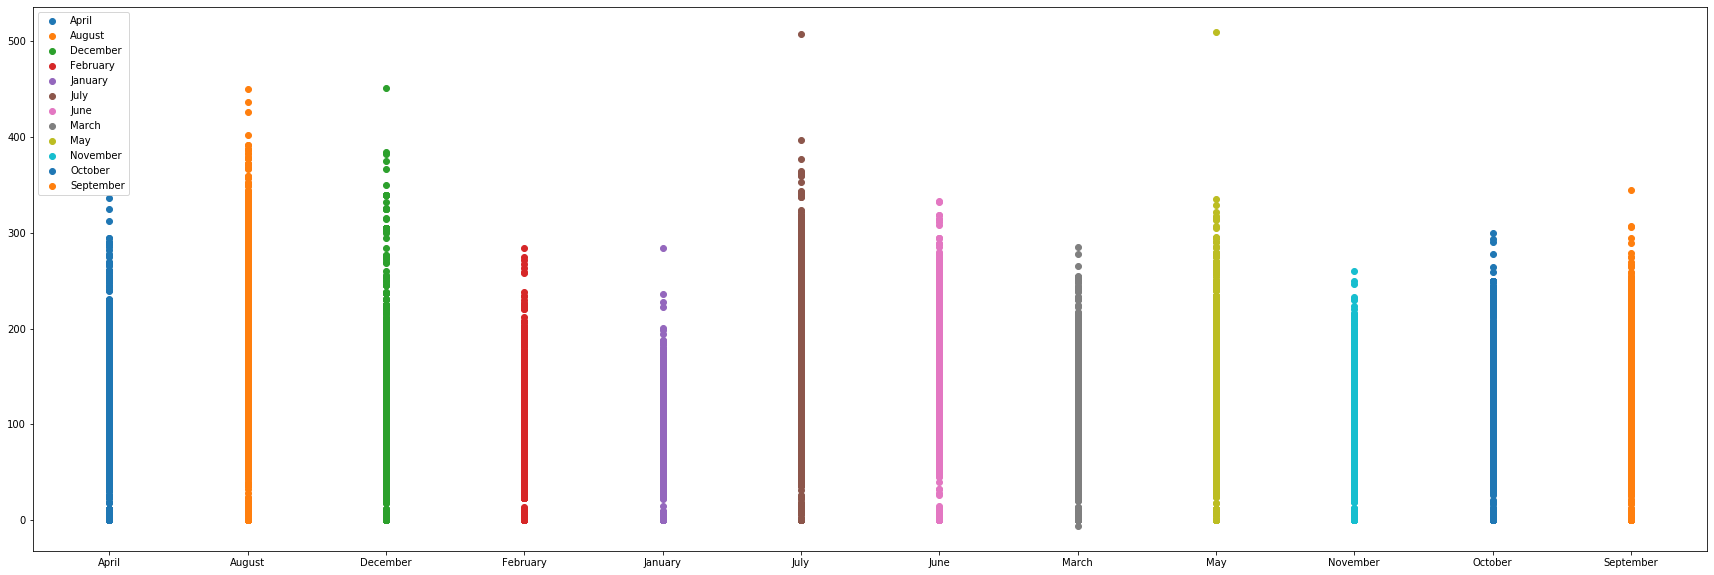

In [20]:
df_hotel = pd.read_pickle('hotel_bookings_7.pkl')

# Append month-number since that might 
import datetime
df_hotel['arrival_date_month_number'] = df_hotel['arrival_date_month'].apply(lambda x: datetime.datetime.strptime(x, "%B").month)


grps = df_hotel.groupby('arrival_date_month')
fig, ax = plt.subplots(figsize=(30,10))
ax.margins(0.05)
for name, group in grps:
    ax.plot(group.arrival_date_month, group.adr, marker='.', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

<hr>

Create correlation heatmap to find stronger correlation between various columns. It should indicate which features have strong positive or negative correlation with __adr__

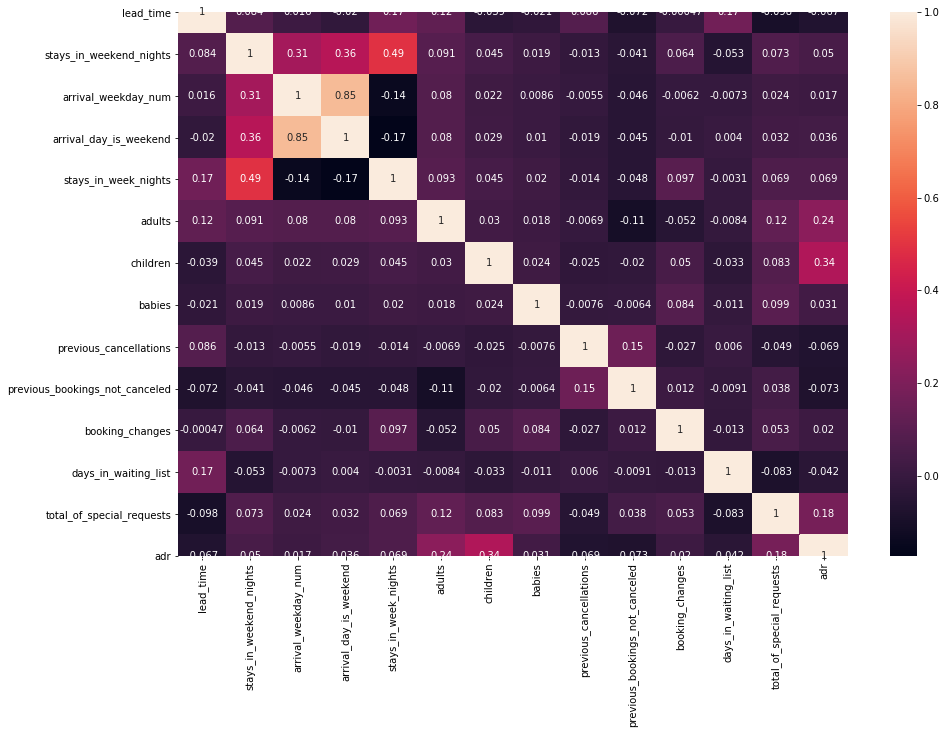

In [21]:
df_hotel = pd.read_pickle('hotel_bookings_7.pkl')

import seaborn as sns

df_hotel_cont = df_hotel[['lead_time', 'stays_in_weekend_nights','arrival_weekday_num','arrival_day_is_weekend', 
                          'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations'
                           , 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                           'total_of_special_requests', 'adr']]

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_hotel_cont.corr(), ax = ax, annot= True)

<hr>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dfcd710>,
      dtype=object)

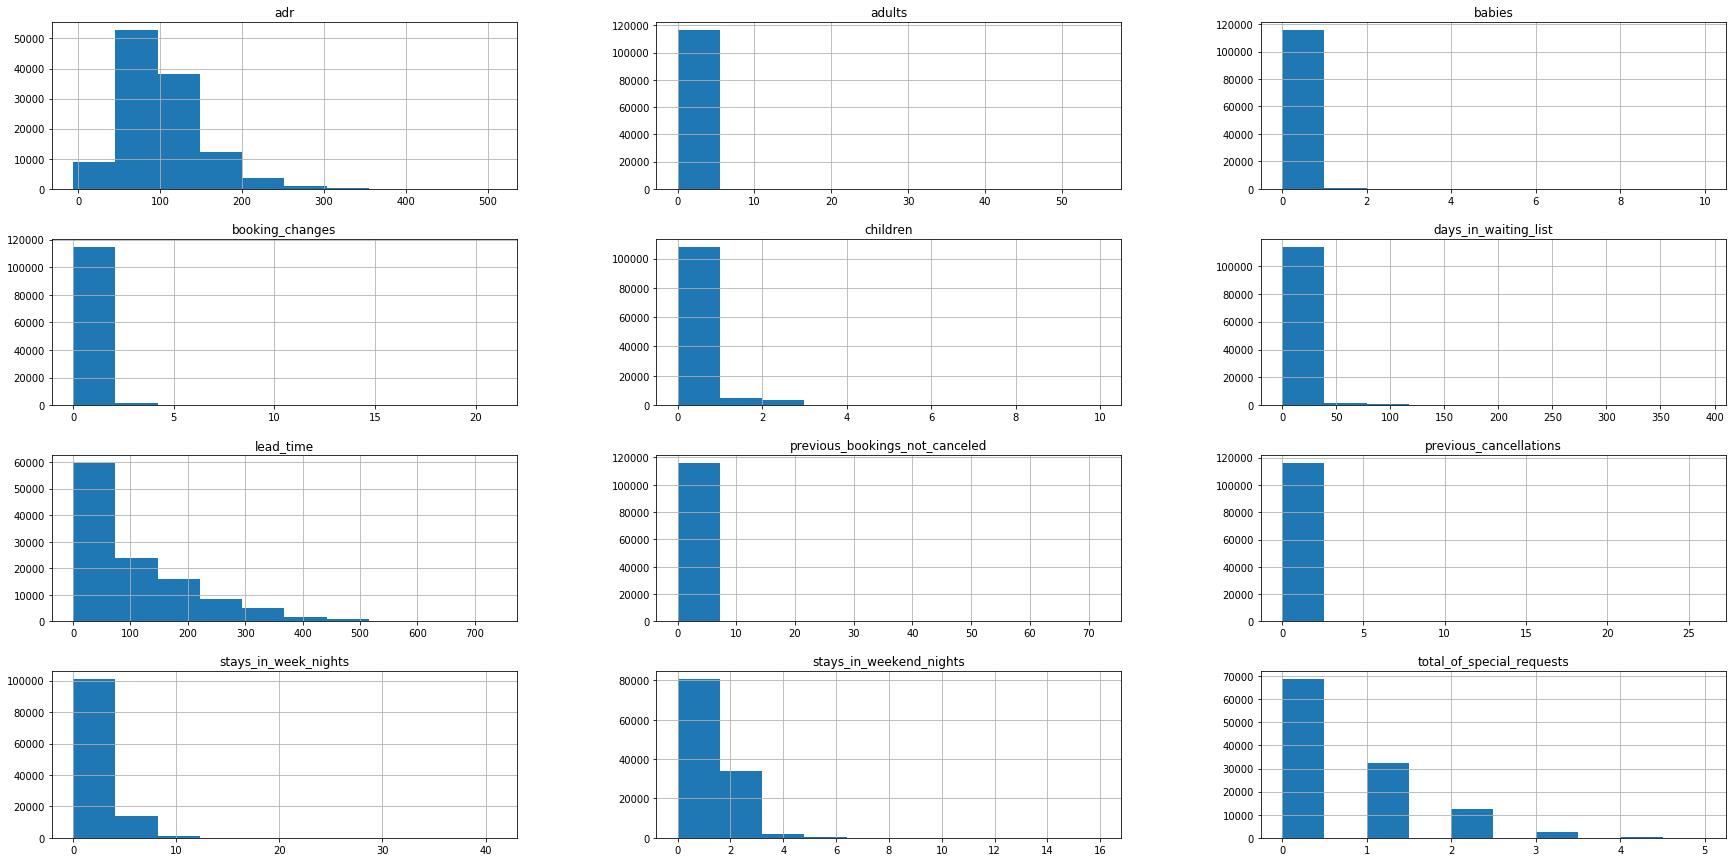

In [22]:
df_hotel = pd.read_pickle('hotel_bookings_7.pkl')

df_hotel_cont = df_hotel[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations'
         , 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests', 'adr']]

df_hotel_cont.hist(figsize = (30, 15))

<hr>

One-hot encode the following columns so that they can be plotted/used for regression analysis.

> - __hotel__
> - __country__
> - __market_segment__
> - __arrival_date_month__
> - __meal__
> - __deposit_type__
> - __reservation_status__
> - __distribution_channel__
> - __reserved_room_type__
> - __assigned_room_type__
> - __customer_type__

In [23]:
df_hotel = pd.read_pickle('hotel_bookings_7.pkl')

categorical_cols = ['hotel', 'country', 'market_segment', 'arrival_date_month','meal','deposit_type',
                    'reservation_status','distribution_channel','reserved_room_type',
                    'assigned_room_type', 'customer_type']

df_hotel = pd.get_dummies(data=df_hotel, columns = categorical_cols)

df_hotel.get_dtype_counts()

df_hotel.to_pickle('hotel_bookings_8.pkl')

print(df_hotel.shape)
df_hotel.dtypes.value_counts()

/Users/sandeepborkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  if __name__ == '__main__':


(116411, 121)


uint8      101
int64       16
float64      4
dtype: int64

In [24]:
#df_hotel_NM_SD=df_hotel
#df_hotel_NM_SD.shape

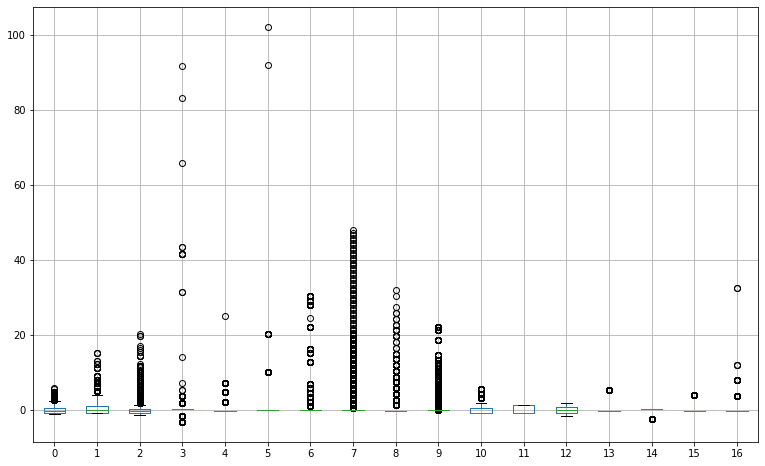

In [25]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

df_hotel_num=df_hotel[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                          'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                          'days_in_waiting_list', 'total_of_special_requests','is_canceled','arrival_date_day_of_month',
                           'is_repeated_guest','agent','company',
                           'required_car_parking_spaces']]


standardizer = StandardScaler()
normalizer = MinMaxScaler()

X_hotel_num_std = standardizer.fit_transform(df_hotel_num)
X_hotel_num_norm = normalizer.fit_transform(df_hotel_num)
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,8)
pd.plotting.boxplot(pd.DataFrame(X_hotel_num_std));

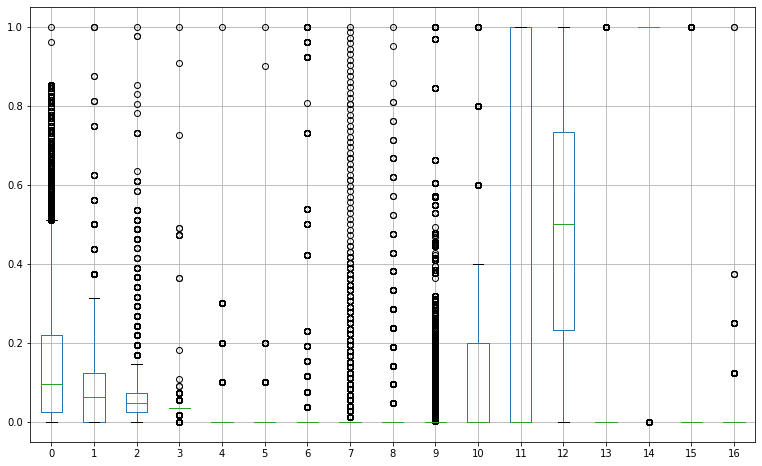

In [26]:
pd.plotting.boxplot(pd.DataFrame(X_hotel_num_norm));# Better than standardizer, so will start to use this

In [28]:
df_hotel = pd.read_pickle('hotel_bookings_8.pkl')

y=df_hotel.pop('adr')


X_train, X_test, y_train, y_test = train_test_split(df_hotel, y, test_size=0.3,random_state=42)
print(f"Train with {X_train.shape[0]} samples and test with {X_test.shape[0]} samples.")


num_attribs = list(df_hotel) # list all the numeric features

normalizer = MinMaxScaler()

X_train_norm = normalizer.fit_transform(X_train)

X_test_norm = normalizer.transform(X_test)

#X_train_norm.desc

X_train_norm=pd.DataFrame(X_train_norm,columns=X_train.columns)
X_test_norm =pd.DataFrame(X_test_norm,columns=X_test.columns)


X_train.to_pickle('X_train_1.pkl')
X_test.to_pickle('X_test_1.pkl')
X_test_norm.to_pickle('X_test_norm_1.pkl')
y_train.to_pickle('y_train_1.pkl')
y_test.to_pickle('y_test_1.pkl')

X_train_norm.to_pickle('X_train_norm_1.pkl')


Train with 81487 samples and test with 34924 samples.


In [29]:
X_train_norm.shape

(81487, 120)

/Users/sandeepborkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Optimal number of features : 16


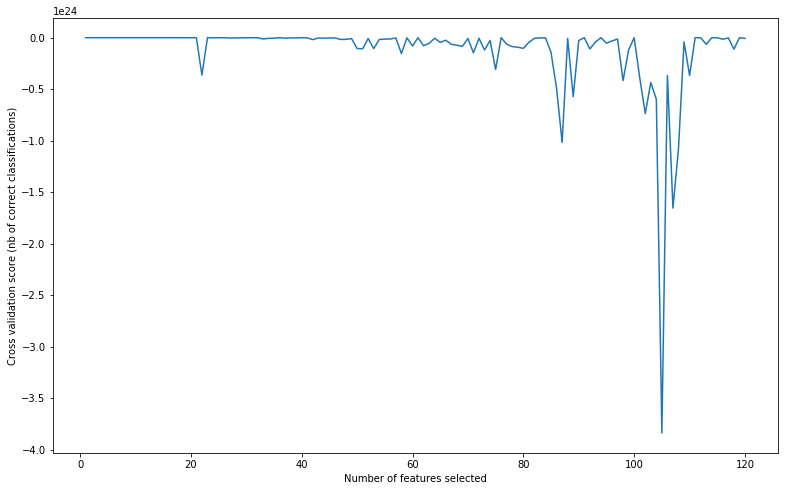

In [30]:
#Feature Selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

X_train_norm=pd.read_pickle('X_train_norm_1.pkl')

#modelX = SVR(kernel="linear")
modelX = LinearRegression()
rfecv = RFECV(estimator=modelX, step=1, scoring='neg_mean_squared_error')
rfecv.fit(X_train_norm, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


Text(0.5, 0, 'dimensions')

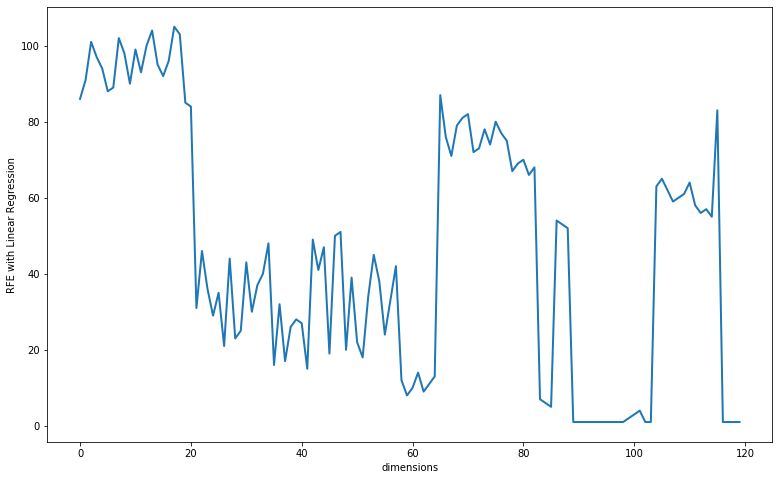

In [41]:
plt.plot(rfecv.ranking_, linewidth=2)
plt.ylabel('RFE with Linear Regression')
plt.xlabel('dimensions')

In [32]:
print(rfecv.grid_scores_)

[-2.26036292e+03 -2.25867593e+03 -2.23920315e+03 -2.23906486e+03
 -2.21714927e+03 -2.21646508e+03 -2.21658980e+03 -2.10920283e+03
 -2.09040551e+03 -2.07577559e+03 -2.05449996e+03 -2.03364198e+03
 -2.00007415e+03 -1.96496255e+03 -1.89844033e+03 -1.89102265e+03
 -3.92587376e+20 -2.47300953e+20 -2.58364233e+20 -2.66786254e+20
 -2.15366383e+20 -3.63414968e+23 -4.42914231e+20 -4.40368886e+20
 -4.56094291e+20 -3.80471778e+20 -2.92587786e+21 -2.35700631e+21
 -1.51325518e+21 -8.91789860e+20 -2.58871621e+20 -7.10779275e+19
 -1.18189755e+22 -7.00827947e+21 -4.64566258e+21 -8.15634749e+20
 -4.74194833e+21 -1.59501337e+21 -2.56117803e+21 -1.02808672e+20
 -1.69901932e+21 -1.86923338e+22 -3.24719935e+21 -3.88614064e+21
 -3.30889557e+21 -2.42648103e+21 -1.68851959e+22 -1.63762591e+22
 -8.51277736e+21 -1.05492904e+23 -1.07798156e+23 -7.56694106e+21
 -1.06278785e+23 -1.71812061e+22 -1.33996983e+22 -1.26350455e+22
 -2.65818226e+21 -1.54254932e+23 -1.69970552e+21 -8.00224549e+22
 -6.05583977e+17 -7.84481

In [33]:
print (rfecv.ranking_)

[ 86  91 101  97  94  88  89 102  98  90  99  93 100 104  95  92  96 105
 103  85  84  31  46  36  29  35  21  44  23  25  43  30  37  40  48  16
  32  17  26  28  27  15  49  41  47  19  50  51  20  39  22  18  34  45
  38  24  33  42  12   8  10  14   9  11  13  87  76  71  79  81  82  72
  73  78  74  80  77  75  67  69  70  66  68   7   6   5  54  53  52   1
   1   1   1   1   1   1   1   1   1   2   3   4   1   1  63  65  62  59
  60  61  64  58  56  57  55  83   1   1   1   1]


In [34]:
print (rfecv.support_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True False False False  True  True False False False False
 False False False False False False False False  True  True  True  True]


In [35]:
f = rfecv.get_support(1) #the most important features
X = X_train_norm[X_train_norm.columns[f]]# final features`
X.head()


,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_L,reserved_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
from sklearn.decomposition import PCA

X_train_norm=pd.read_pickle('X_train_norm_1.pkl')

pca = PCA(n_components=120)

X_train_norm_decomposed = pca.fit_transform(X_train_norm)



In [43]:
cumulsum = np.cumsum(pca.explained_variance_ratio_)
print(cumulsum)

[0.14610934 0.24221005 0.32926594 0.38969117 0.4457521  0.49444058
 0.53165988 0.5678131  0.59607596 0.62234002 0.6459537  0.66720709
 0.68449694 0.70001731 0.71514335 0.72991425 0.74406568 0.75791891
 0.77151262 0.78458763 0.79743385 0.80950029 0.82117013 0.83156959
 0.84186188 0.85162207 0.86120989 0.86996306 0.87844114 0.88679153
 0.8944032  0.90146258 0.90833796 0.91476844 0.92097781 0.92550079
 0.92982049 0.93391195 0.93767623 0.94103535 0.94430662 0.94731283
 0.95020215 0.95300149 0.95573722 0.95826229 0.96066112 0.96302548
 0.9653218  0.96756315 0.96949294 0.97137834 0.97323227 0.97489469
 0.9765401  0.97810699 0.97952614 0.98081644 0.98203287 0.98324191
 0.98441067 0.98537494 0.98632236 0.98721719 0.98807994 0.98888097
 0.98957951 0.99024998 0.99091001 0.99155145 0.99212802 0.99269669
 0.99323903 0.99375963 0.99420529 0.99459842 0.99498713 0.99533745
 0.99567994 0.99600262 0.99632228 0.99663771 0.99694114 0.99722989
 0.99751567 0.99779395 0.99807208 0.99830256 0.99849762 0.9986

In [44]:
np.sum(pca.explained_variance_ratio_)

1.0

Text(0.5, 0, 'dimensions')

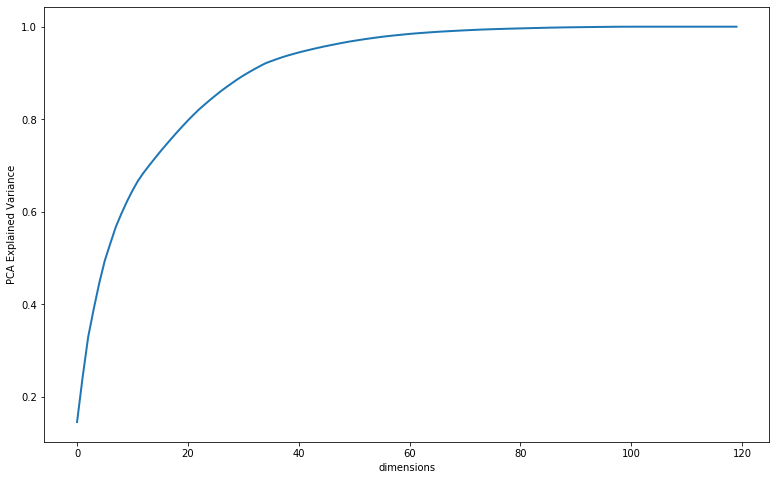

In [45]:
plt.plot(cumulsum, linewidth=2)
plt.ylabel('PCA Explained Variance')
plt.xlabel('dimensions')

In [46]:
X_test_norm = pd.read_pickle('X_test_norm_1.pkl')

X_test_norm_decomposed = pca.transform(X_test_norm)

In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_norm_decomposed, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_hat = model.predict(X_test_norm_decomposed)


In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_absolute_error(y_hat,y_test)

3438524644.8990006

In [ ]:
"""df_hotel['adr']=df_hotel['adr'].map(lambda x: int(x)) # conver to Int values --as selectKBest works on Int
df_adr=df_hotel['adr']"""

In [ ]:
#pd.plotting.boxplot(pd.DataFrame(X_train_norm));# Better than standardizer, so will start to use this

In [ ]:
"""Using SelectKBest to selct top 20 features contributing to model
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#df_hotel_no_adr = df_hotel.drop('adr', axis = 1)

print("*** top 20 columns out of SelectKBest***")

#Convert datatypes
#df_hotel['adr']=df_hotel['adr'].map(lambda x: int(x)) # conver to Int values --as selectKBest works on Int

#df_adr=df_hotel['adr']

selector = SelectKBest(chi2, k=50)
selector.fit(df_hotel, df_adr)

#  get the list
col_names = list(df_hotel.columns[selector.get_support(indices=True)])
print(col_names)"""
